In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding, SimpleRNN, Conv1D
from tensorflow.keras.models import Model

In [3]:
data=pd.read_csv("D:/Downloads/V Extras/spam.csv", encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data=data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.columns=['labels','data']
data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data['b_labels']=data['labels'].map({'ham':0, 'spam':1})
data.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
Y=data['b_labels'].values

In [8]:
df_train, df_test, Ytrain, Ytest=train_test_split(data['data'],Y, test_size=0.33)
print(df_train.shape, Ytrain.shape, df_test.shape)

(3733,) (3733,) (1839,)


In [9]:
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train=tokenizer.texts_to_sequences(df_train)
sequences_test=tokenizer.texts_to_sequences(df_test)

In [10]:
word2idx=tokenizer.word_index
V=len(word2idx)
print("Found %s unique tokens"%V)

Found 7269 unique tokens


In [11]:
data_train=pad_sequences(sequences_train)
data_train.shape   #N*T

(3733, 189)

In [12]:
T=data_train.shape[1]

In [13]:
data_test=pad_sequences(sequences_test,maxlen=T)
data_test.shape

(1839, 189)

In [14]:
D=5
i=Input(shape=(T,))
x=Embedding(V+1, D)(i)
x=Conv1D(32, 3, activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64, 3, activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128, 3, activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(1, activation='sigmoid')(x)
model=Model(i,x)

In [15]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
r=model.fit(data_train, Ytrain, epochs=10, validation_data=(data_test, Ytest))

Epoch 1/10
117/117 [==============================] - 2s 14ms/step - loss: 0.4231 - accuracy: 0.8618 - val_loss: 0.3142 - val_accuracy: 0.8744
Epoch 2/10
117/117 [==============================] - 1s 8ms/step - loss: 0.2206 - accuracy: 0.8993 - val_loss: 0.1196 - val_accuracy: 0.9587
Epoch 3/10
117/117 [==============================] - 1s 8ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.0670 - val_accuracy: 0.9853
Epoch 4/10
117/117 [==============================] - 1s 8ms/step - loss: 0.0148 - accuracy: 0.9965 - val_loss: 0.0636 - val_accuracy: 0.9864
Epoch 5/10
117/117 [==============================] - 1s 8ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0641 - val_accuracy: 0.9859
Epoch 6/10
117/117 [==============================] - 1s 8ms/step - loss: 0.0035 - accuracy: 0.9995 - val_loss: 0.0745 - val_accuracy: 0.9875
Epoch 7/10
117/117 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.0745 - val_accuracy: 0.9875
Epoch

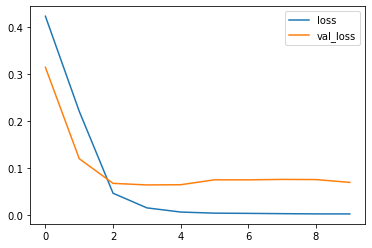

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

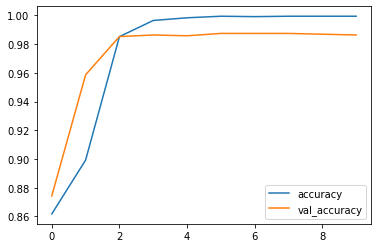

In [18]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [25]:
p_test=model.predict(data_test)

In [26]:
p_test=p_test.argmax(axis=1)

In [27]:
p_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
Ytest

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [29]:
misclassified_idx=np.where(p_test!=Ytest)[0]

In [30]:
misclassified_idx

array([  17,   20,   33,   35,   38,   42,   47,   53,   55,   67,   82,
         86,   95,  105,  109,  128,  130,  141,  142,  144,  146,  148,
        165,  166,  167,  183,  187,  188,  195,  198,  203,  211,  212,
        225,  237,  242,  246,  250,  252,  257,  264,  273,  274,  288,
        291,  292,  296,  298,  299,  303,  316,  326,  332,  334,  336,
        339,  342,  345,  354,  357,  360,  364,  368,  373,  393,  395,
        402,  408,  410,  412,  426,  436,  438,  439,  454,  459,  469,
        477,  483,  484,  492,  493,  509,  512,  524,  526,  536,  541,
        544,  546,  557,  558,  562,  583,  592,  602,  606,  615,  630,
        642,  655,  665,  670,  676,  685,  698,  702,  705,  709,  714,
        734,  736,  747,  748,  762,  767,  777,  780,  784,  793,  794,
        798,  805,  820,  821,  822,  831,  832,  836,  837,  848,  867,
        899,  904,  911,  915,  924,  926,  931,  939,  952,  958,  959,
        960,  968,  989, 1003, 1004, 1007, 1018, 10

In [32]:
data_test[misclassified_idx[8]]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       1186,  102,   95,   35,   13, 1054,    7,    2, 1781,  170,  585])

In [55]:
d=tokenizer.word_index
key=list(d.keys())
val=list(d.values())

In [63]:
j=np.random.choice(misclassified_idx)
mis_data=data_test[j]
for i in mis_data:
    if(i!=0):
        print(key[val.index(i)])

dear
0776xxxxxxx
u've
been
invited
to
xchat
this
is
our
final
attempt
to
contact
u
txt
chat
to
86688
150p
msgrcvdhg
suite342
2lands
row
w1j6hl
ldn
18yrs
